<a href="https://colab.research.google.com/github/Fusa-F/Hotmot_cal_checker/blob/main/hotmot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Chromiumとseleniumをインストール
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

前処理を開始
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.ne

In [ ]:
# -*- coding: utf-8 -*-

#ライブラリをインポート
from selenium import webdriver
import time
from selenium.webdriver.support.ui import WebDriverWait

#---------------------------------------------------------------------------------------
# 処理開始
#---------------------------------------------------------------------------------------
# ブラウザをheadlessモード実行
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)
# driver.implicitly_wait(10)

# サイトにアクセス
url = 'https://www.hottomotto.com/menu_list/index/1'
driver.get(url)
# time.sleep(3)

# driver.find_elements_by_css_selector("xxx") 的な処理を自由に

item = []

# メニューをすべて取得
c = 'c-menu__item-inr'
eles = driver.find_elementｓ_by_class_name(c)

# 空配列の削除
l = []
for ele in eles:
  t = ele.text.split('\n')
  if t[0] != '':
    l.append(ele)

count = len(l)
print('商品はぜんぶで' + str(count) + 'あるよ')

print('取得開始...')
i = 0
for i in range(count):
  es = WebDriverWait(driver, 5).until(lambda x: x.find_elements_by_class_name(c))
  e = es[i]

  # [商品名, 値段]
  t = e.text.split('\n')
  if '⼩盛りOK' in t[0]:
    t.pop(0)
  try:
    t[1] = t[1].split('円')[0]
    t[1] = int(t[1].replace(',', ''))
  except IndexError:
    break

  e.click()
  cl = 'c-table__body'
  bodys = WebDriverWait(driver, 5).until(lambda x: x.find_elements_by_class_name(cl))

  # [商品名, 値段, 熱量]
  b = bodys[0].text.replace(',', '')
  t.append(int(b))

  # 値段あたりのカロリー数=コスパを計算
  cost = t[1]
  kcal = t[2]
  val = kcal / cost
  
  # [商品名, 値段, 熱量, コスパ]
  t.append(val)

  b = 'メニュー一覧'
  WebDriverWait(driver, 5).until(lambda x: x.find_element_by_link_text(b)).click()

  print(str(i+1) + '/' + str(count))
  print(t)
  item.append(t)
  i += 1

print('取得完了!!!!!!!!')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead


商品はぜんぶで72あるよ
取得開始...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


1/72
['カニクリームコロッケ弁当', 500, 890, 1.78]
2/72
['プラスから揚カニクリームコロッケ弁当', 650, 1121, 1.7246153846153847]
3/72
['プラスサラダカニクリームコロッケ弁当', 600, 901, 1.5016666666666667]
4/72
['しょうが焼き＆チキンカツ弁当', 500, 892, 1.784]
5/72
['プラスから揚しょうが焼き＆チキンカツ弁当', 650, 1123, 1.7276923076923076]
6/72
['プラスサラダしょうが焼き＆チキンカツ弁当', 600, 903, 1.505]
7/72
['焼鳥親子丼', 490, 724, 1.4775510204081632]
8/72
['中華あんかけごはん', 590, 633, 1.0728813559322035]
9/72
['中華あんかけかた焼きそば', 640, 549, 0.8578125]
10/72
['牛すき焼き弁当', 590, 784, 1.3288135593220338]
11/72
['肉増し牛すき焼き弁当', 790, 973, 1.231645569620253]
12/72
['のり弁当', 330, 675, 2.0454545454545454]
13/72
['特のりタル弁当', 420, 901, 2.145238095238095]
14/72
['BIGのり弁当（ナポリタン）', 550, 1038, 1.8872727272727272]
15/72
['幕の内弁当(なす味噌炒めとさばの塩焼き)', 590, 724, 1.2271186440677966]
16/72
['特撰幕の内弁当', 790, 729, 0.9227848101265823]
17/72
['さば塩焼き弁当', 460, 776, 1.6869565217391305]
18/72
['しゃけ塩焼き弁当', 540, 733, 1.3574074074074074]
19/72
['洋風バラエティ弁当', 540, 884, 1.637037037037037]
20/72
['スペシャル洋風バラエティ弁当', 890, 1082, 1.2157303370786516]
21

In [ ]:
import pandas as pd
df = pd.DataFrame(item, columns = ['商品名', '値段', 'カロリー', '値段毎カロリー'])
print(df)

                     商品名   値段  カロリー   値段毎カロリー
0           カニクリームコロッケ弁当  500   890  1.780000
1     プラスから揚カニクリームコロッケ弁当  650  1121  1.724615
2     プラスサラダカニクリームコロッケ弁当  600   901  1.501667
3         しょうが焼き＆チキンカツ弁当  500   892  1.784000
4   プラスから揚しょうが焼き＆チキンカツ弁当  650  1123  1.727692
..                   ...  ...   ...       ...
67      プラスサラダおろしチキン竜田弁当  590   918  1.555932
68       プラスサラダロースとんかつ弁当  590   846  1.433898
69       プラスサラダデミハンバーグ弁当  690   742  1.075362
70      プラスサラダおろしハンバーグ弁当  690   731  1.059420
71      プラスサラダチーズハンバーグ弁当  790   781  0.988608

[72 rows x 4 columns]


In [ ]:
!pip install japanize-matplotlib
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=da01ec528bf22ed956d538024482cc73341d43c70064933b56b36d105fe6059c
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


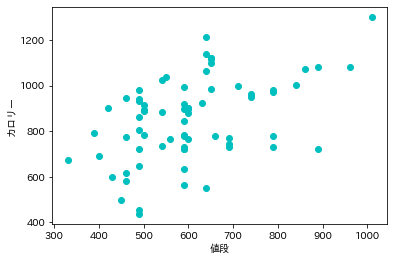

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from adjustText import adjust_text

fig, ax = plt.subplots()
df.plot(0,1, kind='scatter', ax=ax)
for k, v in df.iterrows():
  ax.annotate(k, xy=(v[1],v[2]),size=20)

x = df['値段']
y = df['カロリー']
labels = df['商品名']
plt.clf()
plt.plot(x, y, 'bo', c="c")

plt.xlabel('値段')
plt.ylabel('カロリー')

# texts = [ plt.text(x[k], y[k], labels[k], ha='center', va='center') for k in range(count) ]
# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

In [ ]:
s_item = sorted(item, reverse=True, key=lambda x: x[3])
print('----------------------- 値段あたりのカロリーが大きい順 -----------------------\n')
print(*s_item, sep='\n')

----------------------- 値段あたりのカロリーが大きい順 -----------------------

['特のりタル弁当', 420, 901, 2.145238095238095]
['ロースかつ丼', 460, 944, 2.0521739130434784]
['のり弁当', 330, 675, 2.0454545454545454]
['から揚弁当(4コ入り)', 390, 794, 2.0358974358974358]
['特から揚弁当(6コ入り)', 490, 982, 2.0040816326530613]
['ロースかつとじ弁当', 490, 942, 1.9224489795918367]
['おろしチキン竜田弁当', 490, 934, 1.9061224489795918]
['プラスから揚から揚弁当(4コ入り)', 540, 1023, 1.8944444444444444]
['プラスから揚特から揚弁当(6コ入り)', 640, 1211, 1.8921875]
['BIGのり弁当（ナポリタン）', 550, 1038, 1.8872727272727272]
['チキン南蛮弁当', 500, 914, 1.828]
['九州チキン南蛮弁当', 500, 894, 1.788]
['しょうが焼き＆チキンカツ弁当', 500, 892, 1.784]
['カニクリームコロッケ弁当', 500, 890, 1.78]
['プラスから揚おろしチキン竜田弁当', 640, 1137, 1.7765625]
['ロースとんかつ弁当', 490, 862, 1.7591836734693878]
['プラスから揚しょうが焼き＆チキンカツ弁当', 650, 1123, 1.7276923076923076]
['プラスから揚カニクリームコロッケ弁当', 650, 1121, 1.7246153846153847]
['親子丼', 400, 689, 1.7225]
['プラスから揚チキン南蛮弁当', 650, 1117, 1.7184615384615385]
['プラスから揚九州チキン南蛮弁当', 650, 1097, 1.6876923076923076]
['さば塩焼き弁当', 460, 776, 1.68695652

In [ ]:
s_item = sorted(item, key=lambda x: x[1])
print('----------------------- 値段が安い順 -----------------------\n')
print(*s_item, sep='\n')

----------------------- 値段が安い順 -----------------------

['のり弁当', 330, 675, 2.0454545454545454]
['から揚弁当(4コ入り)', 390, 794, 2.0358974358974358]
['親子丼', 400, 689, 1.7225]
['特のりタル弁当', 420, 901, 2.145238095238095]
['高菜弁当', 430, 597, 1.3883720930232557]
['カレー', 450, 497, 1.1044444444444443]
['さば塩焼き弁当', 460, 776, 1.6869565217391305]
['彩・鶏そぼろ弁当', 460, 618, 1.3434782608695652]
['彩・鮭わかめ弁当', 460, 580, 1.2608695652173914]
['ロースかつ丼', 460, 944, 2.0521739130434784]
['焼鳥親子丼', 490, 724, 1.4775510204081632]
['ドラえもんランチ/ドラミちゃんランチ(ふりかけ)', 490, 435, 0.8877551020408163]
['ドラえもんランチ/ドラミちゃんランチ(カレー)', 490, 453, 0.9244897959183673]
['特から揚弁当(6コ入り)', 490, 982, 2.0040816326530613]
['おろしチキン竜田弁当', 490, 934, 1.9061224489795918]
['ロースとんかつ弁当', 490, 862, 1.7591836734693878]
['ロースかつとじ弁当', 490, 942, 1.9224489795918367]
['肉野菜炒め弁当', 490, 646, 1.3183673469387756]
['プラスサラダから揚弁当(4コ入り)', 490, 805, 1.6428571428571428]
['カニクリームコロッケ弁当', 500, 890, 1.78]
['しょうが焼き＆チキンカツ弁当', 500, 892, 1.784]
['チキン南蛮弁当', 500, 914, 1.828]
['九州チキン南蛮弁当', 500

In [ ]:
s_item = sorted(item, reverse=True, key=lambda x: x[2])
print('----------------------- カロリーが大きい順 -----------------------\n')
print(*s_item, sep='\n')

----------------------- カロリーが大きい順 -----------------------

['プラスから揚Wカルビ焼肉弁当', 1010, 1302, 1.2891089108910891]
['プラスから揚特から揚弁当(6コ入り)', 640, 1211, 1.8921875]
['プラスから揚おろしチキン竜田弁当', 640, 1137, 1.7765625]
['プラスから揚しょうが焼き＆チキンカツ弁当', 650, 1123, 1.7276923076923076]
['プラスから揚カニクリームコロッケ弁当', 650, 1121, 1.7246153846153847]
['プラスから揚チキン南蛮弁当', 650, 1117, 1.7184615384615385]
['プラスから揚九州チキン南蛮弁当', 650, 1097, 1.6876923076923076]
['プラスサラダWカルビ焼肉弁当(肉2倍)', 960, 1083, 1.128125]
['スペシャル洋風バラエティ弁当', 890, 1082, 1.2157303370786516]
['Wカルビ焼肉弁当(肉2倍)', 860, 1072, 1.2465116279069768]
['プラスから揚ロースとんかつ弁当', 640, 1065, 1.6640625]
['BIGのり弁当（ナポリタン）', 550, 1038, 1.8872727272727272]
['プラスから揚から揚弁当(4コ入り)', 540, 1023, 1.8944444444444444]
['プラスから揚チーズハンバーグ弁当', 840, 1001, 1.1916666666666667]
['プラスから揚カルビ焼肉弁当', 710, 997, 1.404225352112676]
['プラスサラダ特から揚弁当(6コ入り)', 590, 993, 1.6830508474576271]
['プラスから揚しょうが焼き弁当', 650, 985, 1.5153846153846153]
['スペシャルコンビ丼', 790, 982, 1.2430379746835443]
['特から揚弁当(6コ入り)', 490, 982, 2.0040816326530613]
['肉増し牛すき焼き弁